## Importing useful packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%matplotlib notebook

## Setting initial boundary conditions and some constants

In [2]:
rodLength = 1
integrationTime = 1500

N = 15            # Number of subdivisions
dx = rodLength/N  # Length of each space subdivision
dt = 0.7          # Duration of each time subdivision
k = 0.0002        # Thermal conductivity coefficient

i_T = 0  # Initial temperature boundary condition
l_T = 40 # Left boundary condition
r_T = 20 # Right boundary condition

## Setting up spatial and time variables

In [3]:
x = np.linspace(dx/2, rodLength-dx/2, N)
T = np.ones(N)*i_T
Tprime = np.empty(N)

## Visualization

<IPython.core.display.Javascript object>


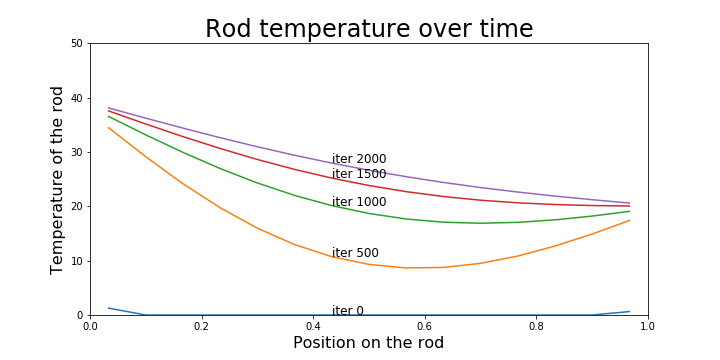

[0, 1, 0, 50]

In [4]:
plt.figure(figsize=(10,5))
plt.xlabel('Position on the rod', fontsize=16)
plt.ylabel('Temperature of the rod', fontsize=16)
plt.title('Rod temperature over time', fontsize=24)
plt.axis([0, rodLength, 0, 50])

## Main Loop

In [5]:
for i in range(int(integrationTime/dt)):
    for j in range(0, N-1):
        Tprime[j] = k*(T[j + 1] - 2*T[j] + T[j-1])/dx**2
    
    Tprime[0]   = k*(T[1] - 2*T[0] + l_T)/dx**2
    Tprime[N-1] = k*(r_T - 2*T[N-1] + T[N-2])/dx**2
    
    T = T + Tprime*dt
    
    if i % 500 == 0:
        plt.plot(x, T)
        plt.text(x[6], T[6], 'iter {}'.format(i), fontsize=12)